In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

import seaborn as sns

Load raw data

In [2]:
df = pd.read_excel("./crime data/crime2.xlsx",sheet_name='Sheet1')

In [3]:
print(df)

     name  city statenam  state  censdist  year  sworn  civil  elecyear  \
0     NaN     1      NaN    NaN       NaN  1960    NaN    NaN       NaN   
1     NaN     1      NaN    NaN       NaN  1961    NaN    NaN       NaN   
2     NaN     1      NaN    NaN       NaN  1962    NaN    NaN       NaN   
3     NaN     1      NaN    NaN       NaN  1963    NaN    NaN       NaN   
4     NaN     1      NaN    NaN       NaN  1964    NaN    NaN       NaN   
...   ...   ...      ...    ...       ...   ...    ...    ...       ...   
2355  NaN    85      NaN    NaN       NaN  1995    NaN    NaN       NaN   
2356  NaN    85      NaN    NaN       NaN  1996    NaN    NaN       NaN   
2357  NaN    85      NaN    NaN       NaN  1997    NaN    NaN       NaN   
2358  NaN    85      NaN    NaN       NaN  1998    NaN    NaN       NaN   
2359  NaN    85      NaN    NaN       NaN  1999    NaN    NaN       NaN   

      governor  ...  cityfemh  sta_educ  sta_welf  price  termlim  jid  mayor  \
0          NaN  ..

A glimpse of raw data

In [4]:
print(df.describe())

              city        state     censdist         year         sworn  \
count  2360.000000  1416.000000  1177.000000  2360.000000   1405.000000   
mean     34.389831    24.559322    60.485981  1979.500000   1998.071886   
std      22.465284    15.266143    24.771233    11.545843   3814.098736   
min       1.000000     1.000000    14.000000  1960.000000     61.000000   
25%      16.000000     9.000000    35.000000  1969.750000    619.000000   
50%      32.000000    25.000000    62.000000  1979.500000    970.000000   
75%      47.000000    38.000000    85.000000  1989.250000   1627.000000   
max      85.000000    51.000000    95.000000  1999.000000  31671.000000   

             civil     elecyear     governor       murder         rape  ...  \
count  1404.000000  1416.000000  1415.000000  1346.000000  1339.000000  ...   
mean    448.712013     0.306497     0.250177   155.046062   456.787901  ...   
std     873.014683     0.461202     0.433268   264.264511   554.469753  ...   
min     

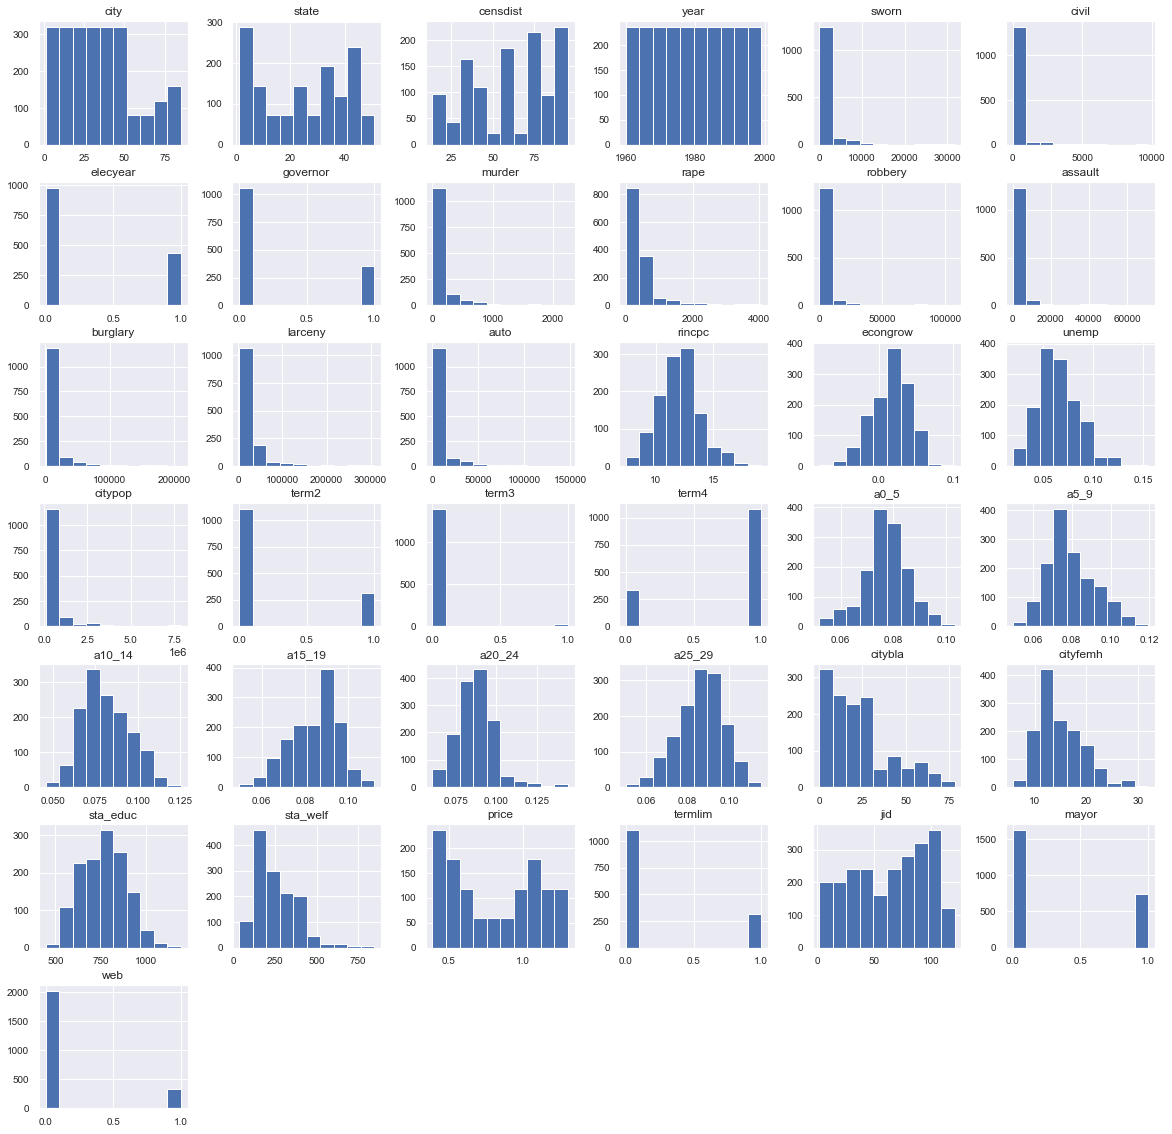

In [5]:
sns.set()
df.hist(sharex = False, sharey = False, xlabelsize = 10, ylabelsize = 10, figsize=(20, 20))
pyplot.show()

Remove irrelated attributes

In [6]:
df=df.drop(labels=['date_wa','date_my','jid','name','statenam'],axis=1)

Missing Data Visualization

<AxesSubplot:>

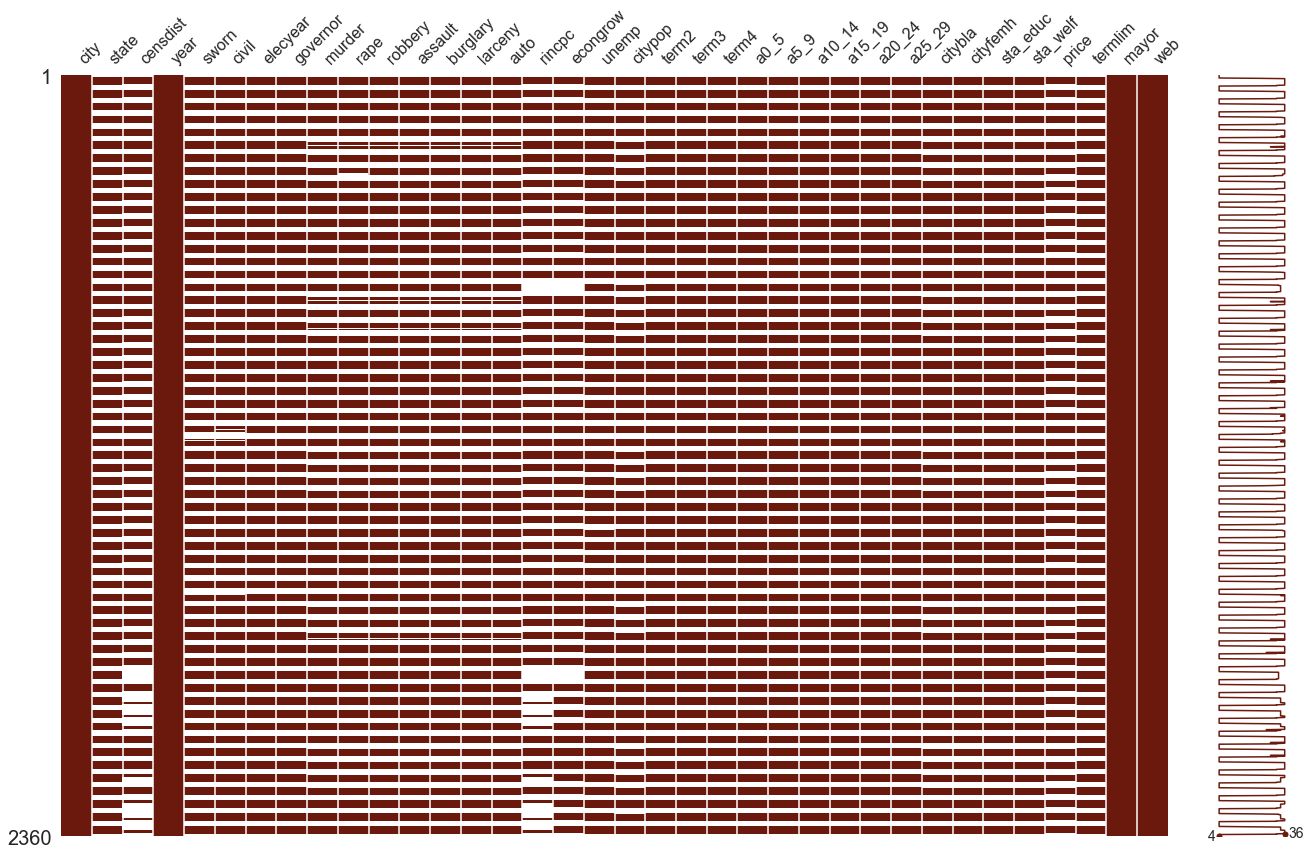

In [7]:
md_copy = df
md_copy = md_copy.replace(-1, np.NaN)
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=md_copy.iloc[:,:], figsize=(22, 14), color=(0.42, 0.1, 0.05))

Remove samples in which attributes of crime_types contain NaN

In [8]:
crime_types = ['murder', 'rape', 'robbery', 'assault',	'burglary',	'larceny',	'auto']
df.dropna(axis=0,how='any',subset=crime_types,inplace=True)
print(df)

      city  state  censdist  year  sworn  civil  elecyear  governor  murder  \
10       1   31.0      85.0  1970  370.0  124.0       0.0       1.0    19.0   
11       1   31.0      85.0  1971  377.0  197.0       0.0       0.0    31.0   
12       1   31.0      85.0  1972  389.0  155.0       0.0       0.0    23.0   
13       1   31.0      85.0  1973  447.0  137.0       1.0       0.0    28.0   
14       1   31.0      85.0  1974  486.0  161.0       0.0       1.0    31.0   
...    ...    ...       ...   ...    ...    ...       ...       ...     ...   
2348    85   43.0      74.0  1988  350.0  128.0       0.0       0.0    26.0   
2349    85   43.0      74.0  1989  355.0  139.0       1.0       0.0    19.0   
2350    85   43.0      74.0  1990  370.0  146.0       0.0       1.0    29.0   
2351    85   43.0       NaN  1991  380.0  144.0       1.0       0.0    32.0   
2352    85   43.0       NaN  1992  374.0  144.0       0.0       0.0    30.0   

       rape  ...    a20_24    a25_29   citybla   ci

Merge the number of crime cases to 'total_crime'

In [9]:
total_crime = df[crime_types[0]].to_numpy()
for i in range(1,len(crime_types)):
    total_crime+=df[crime_types[i]].to_numpy()
print(total_crime)

[19809. 23710. 23474. ... 26535. 27459. 27608.]


In [10]:
df['total_crime']=total_crime

remove any sample containing NaN

In [11]:
df.dropna(axis=0,how='any',inplace=True)

In [12]:
print(df)

      city  state  censdist  year  sworn  civil  elecyear  governor   murder  \
10       1   31.0      85.0  1970  370.0  124.0       0.0       1.0  19809.0   
11       1   31.0      85.0  1971  377.0  197.0       0.0       0.0  23710.0   
12       1   31.0      85.0  1972  389.0  155.0       0.0       0.0  23474.0   
13       1   31.0      85.0  1973  447.0  137.0       1.0       0.0  22680.0   
14       1   31.0      85.0  1974  486.0  161.0       0.0       1.0  22694.0   
...    ...    ...       ...   ...    ...    ...       ...       ...      ...   
2346    85   43.0      74.0  1986  348.0  134.0       0.0       1.0  23583.0   
2347    85   43.0      74.0  1987  345.0  114.0       1.0       0.0  25440.0   
2348    85   43.0      74.0  1988  350.0  128.0       0.0       0.0  28364.0   
2349    85   43.0      74.0  1989  355.0  139.0       1.0       0.0  28257.0   
2350    85   43.0      74.0  1990  370.0  146.0       0.0       1.0  26535.0   

       rape  ...    a25_29   citybla   

Convert the number of crime cases to criminal risk level based on percentile, including 4 levels.

In [13]:
def hazard2grade(hazard, p):
    for i in range(len(p)):
        if hazard < p[i]:
            return i
    return len(p)

def divide_groups(results_df, col, risk_percentiles=[50]):
    p = np.percentile(results_df[col], risk_percentiles)
    for i in range(len(p)):
        print("risk level of {}%: {}".format(str(risk_percentiles[i]), str(p[i])))
    results_df[col+'_level'] = [hazard2grade(risk, p) for risk in results_df[col]]
    return results_df

In [14]:
crime_types.append('total_crime')
for crime in crime_types:
    print(crime)
    divide_groups(df,crime,[25,50,75])

murder
risk level of 25%: 28848.5
risk level of 50%: 40492.0
risk level of 75%: 61937.75
rape
risk level of 25%: 198.25
risk level of 50%: 325.0
risk level of 75%: 502.0
robbery
risk level of 25%: 1126.5
risk level of 50%: 2089.5
risk level of 75%: 4266.75
assault
risk level of 25%: 1208.25
risk level of 50%: 2072.5
risk level of 75%: 3662.5
burglary
risk level of 25%: 7670.75
risk level of 50%: 10822.0
risk level of 75%: 15897.75
larceny
risk level of 25%: 13698.0
risk level of 50%: 19973.0
risk level of 75%: 29604.5
auto
risk level of 25%: 2500.25
risk level of 50%: 4083.5
risk level of 75%: 7510.0
total_crime
risk level of 25%: 28848.5
risk level of 50%: 40492.0
risk level of 75%: 61937.75


In [16]:
df.to_csv('./crime data/crime_preprocessed.csv', index=False)

Visualize data after removing samples containing missing values

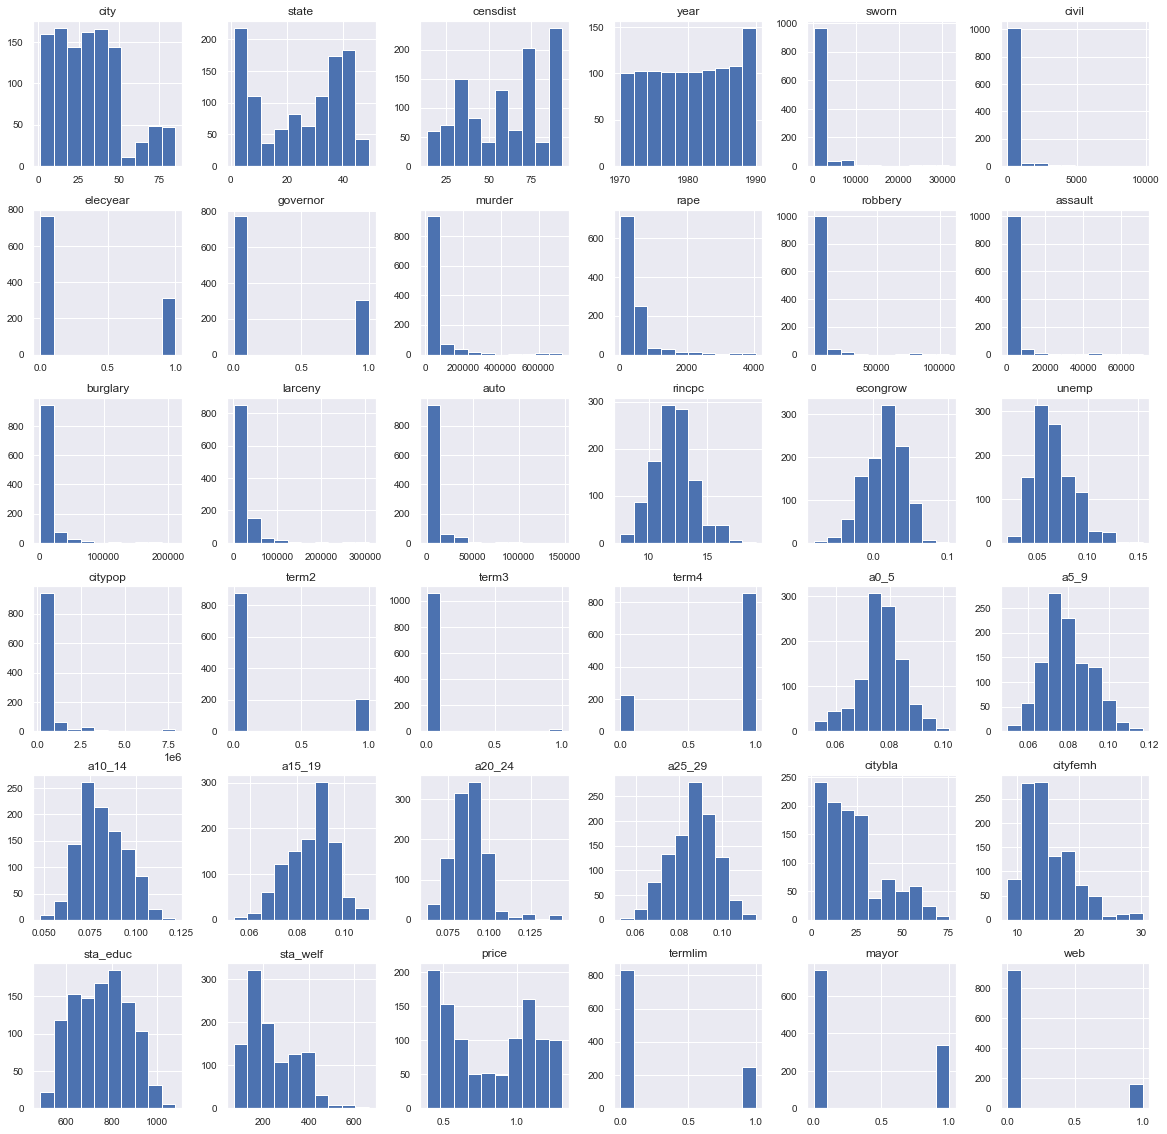

In [17]:
sns.set()
df.iloc[:,:-9].hist(sharex = False, sharey = False, xlabelsize = 10, ylabelsize = 10, figsize=(20, 20))
pyplot.show()

Analyze Pearson Correlation of remaining attributes

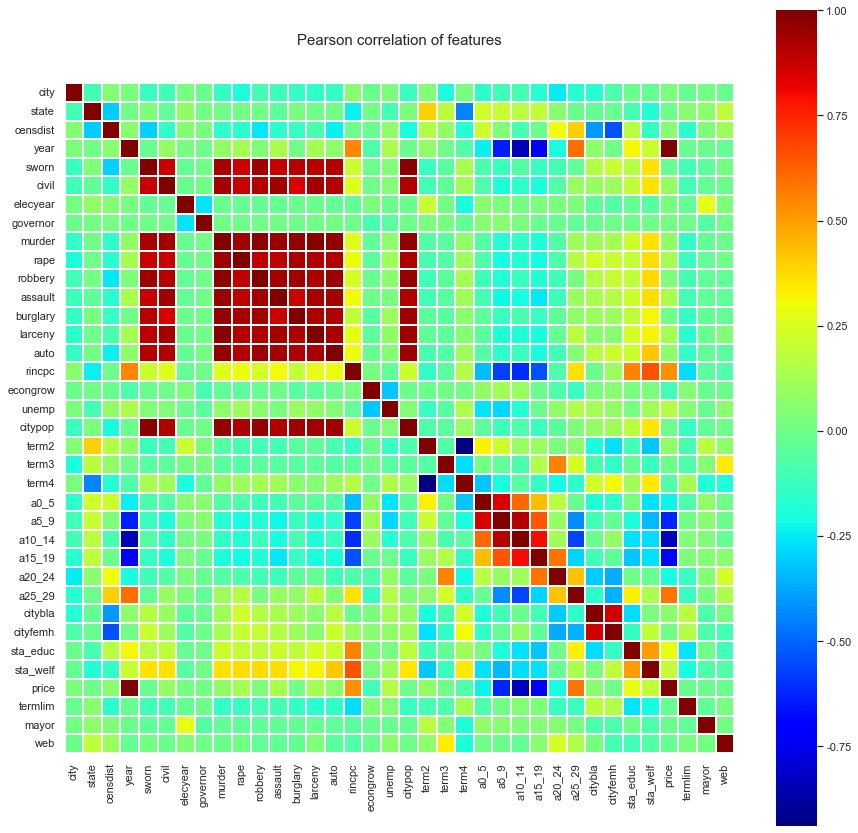

In [18]:
colormap = pyplot.cm.jet
pyplot.figure(figsize=(15,15))
pyplot.title('Pearson correlation of features', y=1.05, size=15)
sns.heatmap(df.iloc[:,:-9].corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white')
pyplot.show()

Remove less related attributes according to threshold of Pearson Correlation

In [24]:
df_corr = df.iloc[:,:-9].corr()

In [25]:
attr_del = []
thre = 0.75 # threshold of Pearson Correlation
for col in df_corr.columns:
    tmp = df_corr.loc[:,col].drop(col)
    tmp = tmp[(tmp>thre) | (tmp<-thre)]
    if len(tmp)==0:
        attr_del.append(col)
print(attr_del)

['censdist', 'rincpc', 'term3', 'a20_24', 'a25_29', 'sta_educ', 'sta_welf']


In [26]:
df.drop(labels=attr_del,axis=1,inplace=True)

In [27]:
df.to_csv('./crime data/crime_filter_pearson_{}.csv'.format(str(thre)),index=False)

In [28]:
print(df)

      year  sworn  civil   murder   rape  robbery  assault  burglary  larceny  \
10    1970  370.0  124.0  19809.0   95.0    433.0    893.0    5235.0  11302.0   
11    1971  377.0  197.0  23710.0  103.0    667.0    988.0    6232.0  13701.0   
12    1972  389.0  155.0  23474.0  154.0    857.0   1159.0    7023.0  12553.0   
13    1973  447.0  137.0  22680.0  169.0    909.0   1157.0    6942.0  11852.0   
14    1974  486.0  161.0  22694.0  183.0    803.0    877.0    6547.0  12781.0   
...    ...    ...    ...      ...    ...      ...      ...       ...      ...   
2346  1986  348.0  134.0  23583.0  204.0    362.0    754.0    6247.0  14742.0   
2347  1987  345.0  114.0  25440.0  166.0    391.0   1248.0    6477.0  16086.0   
2348  1988  350.0  128.0  28364.0  171.0    510.0   1294.0    7999.0  17096.0   
2349  1989  355.0  139.0  28257.0  193.0    570.0   1212.0    6948.0  18127.0   
2350  1990  370.0  146.0  26535.0  240.0    446.0    892.0    6131.0  17548.0   

        auto  ...     price